## Task 1

<span style="color: orange;">Perform Data. Cleaning Clean a dataset by removing missing values and outliers.</span>


## Data Dictionary

| Variable  | Definition                          | Key                               |
|-----------|-------------------------------------|-----------------------------------|
| survival  | Survival                            | 0 = No, 1 = Yes                   |
| pclass    | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd         |
| sex       | Sex                                 |                                   |
| Age       | Age in years                        |                                   |
| sibsp     | # of siblings / spouses aboard      |                                   |
| parch     | # of parents / children aboard      |                                   |
| ticket    | Ticket number                       |                                   |
| fare      | Passenger fare                      |                                   |
| cabin     | Cabin number                        |                                   |
| embarked  | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |



## Variable Notes

**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


In [104]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings 
warnings.filterwarnings('ignore')

In [105]:
# load data and show first 5 rows
df = pd.read_csv('titanic.csv')
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df.info()   # show data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
# caluclate missing values in each column and show in percentage
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing/len(df)*100   
missing.round(2)

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

In [108]:
df.describe(include='all')   # show summary statistics

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



## Initial Observations:

### Missing Values:
- **Age**: 714/891 values are present (~20% missing).
- **Cabin**: Only 204/891 values (~77% missing).
- **Embarked**: 889/891 values (~0.2% missing).

### Columns of Interest:
- **Survived**: Target variable.
- **Pclass, Sex, Age, SibSp, Parch, Fare, Embarked**: Potential predictors.
- **Cabin**: Too sparse; might be simplified to indicate presence or absence.

### Feature Types:
- **PassengerId and Name**: Likely identifiers, can be excluded.
- **Ticket**: Mostly unique, may need encoding or simplification.



## Proposed Cleaning and Feature Engineering Steps:

### Handle Missing Values:
- Fill **Age** with median or use predictive imputation.
- Encode **Cabin** as binary (HasCabin).
- Fill **Embarked** with the mode (S).

### Feature Engineering:
- Create **FamilySize** = SibSp + Parch.
- Create **Title** from Name.
- Bin **Age** and **Fare** into categories.

### Encoding:
- One-hot encode **Sex** and **Embarked**.
- Convert **Pclass** to a categorical feature.


In [109]:
# handle missing values in 'Age' column
df['Age'].fillna(df['Age'].median(), inplace=True)

# handle missing values in 'Embarked' column
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

# Encode 'cabin' column as binary 
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# drop 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)




In [ ]:

# convert the Age column to integer
df['Age'] = df['Age'].astype(int)

In [111]:
# Feature Engineering
# Create 'FamilySize' column
df['FamilySize'] = df['SibSp'] + df['Parch']

# Extract 'Title' from 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Bin 'Age' into categories
bins_age = [0, 12, 20, 40, 60, 80]
labels_age = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
df['AgeBin'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

# Bin 'Fare' into categories
bins_fare = [0, 7.91, 14.45, 31.0,512.33]
labels_fare = ['Low', 'Medium', 'High', 'Very High']
df['FareBin'] = pd.cut(df['Fare'], bins=bins_fare, labels=labels_fare)


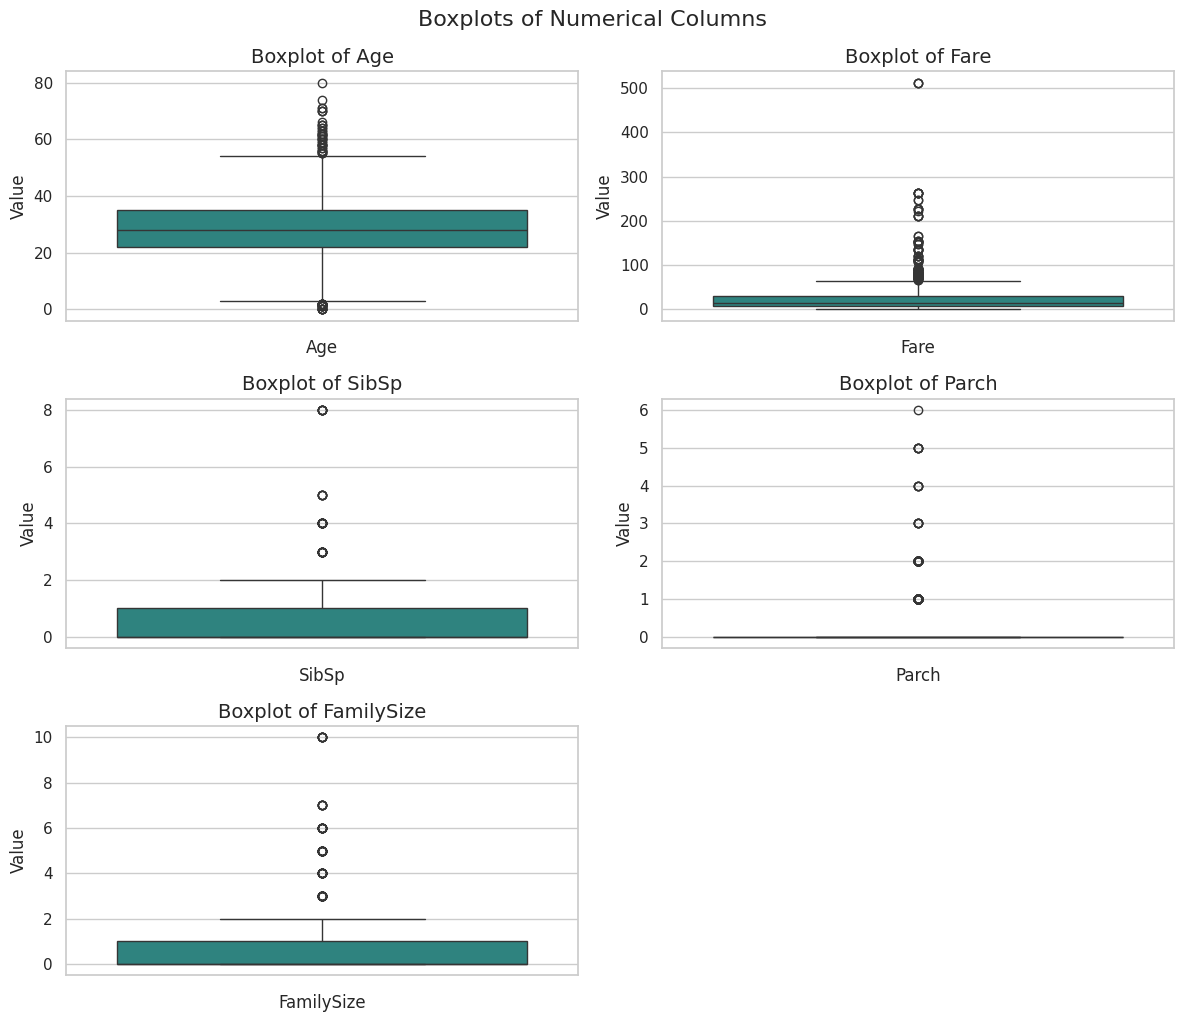

In [119]:
# List of numerical columns to check for outliers
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']

# Plot boxplots for each numerical column
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(df[column], palette='viridis')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Value', fontsize=12)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Columns', fontsize=16, y=1.02)
plt.show()

In [113]:
df1 = df.copy()

In [114]:
# Define a function to cap outliers
def cap_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df1[column].quantile(lower_quantile)
    upper_bound = df1[column].quantile(upper_quantile)
    df1[column] = df1[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Cap outliers in the numerical columns
for column in numerical_columns:
    cap_outliers(df1, column=column)

